# Assignment-6

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='ISO-8859-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Data Preprocessing

In [10]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [14]:
df.shape

(11251, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [13]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

# Delete Unecessary columns

In [17]:
df = df.drop(['unnamed1', 'Status'], axis=1)

# Checking Null values

In [18]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [19]:
df['Amount'].fillna(df['Amount'].mean(), inplace=True)

In [20]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

# Checking duplicates

In [21]:
df.duplicated().sum()

8

# Group the sales data by region and calculate the total sales amount for each region

In [25]:
region_sales = df.groupby('State')['Amount'].sum().reset_index()

# Bar plot to visualize the sales distribution by region

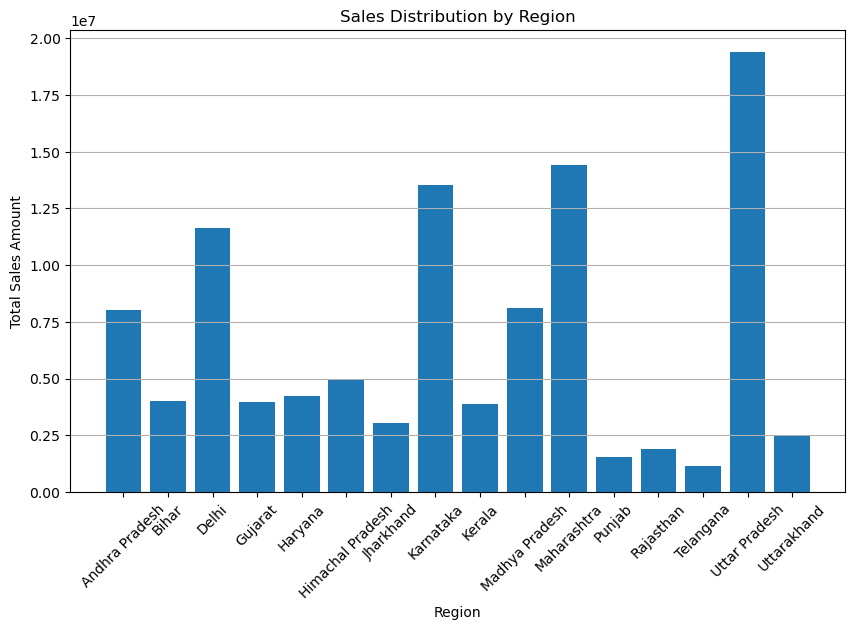

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(region_sales['State'], region_sales['Amount'])
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Distribution by Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Identify the top-performing regions based on the highest sales amount

In [27]:
top_regions = region_sales.nlargest(5, 'Amount')  # Get the top 5 regions
print("Top-performing regions:")
print(top_regions)

Top-performing regions:
             State        Amount
14   Uttar Pradesh  1.939388e+07
10     Maharashtra  1.443700e+07
7        Karnataka  1.353299e+07
2            Delhi  1.163218e+07
9   Madhya Pradesh  8.120049e+06


# Group the sales data by region and product category to calculate the total sales amount for each combination

In [28]:
region_category_sales = df.groupby(['State', 'Product_Category'])['Amount'].sum().unstack().fillna(0)

# Bar plots to compare sales amounts across different regions and product categories

<Figure size 1200x600 with 0 Axes>

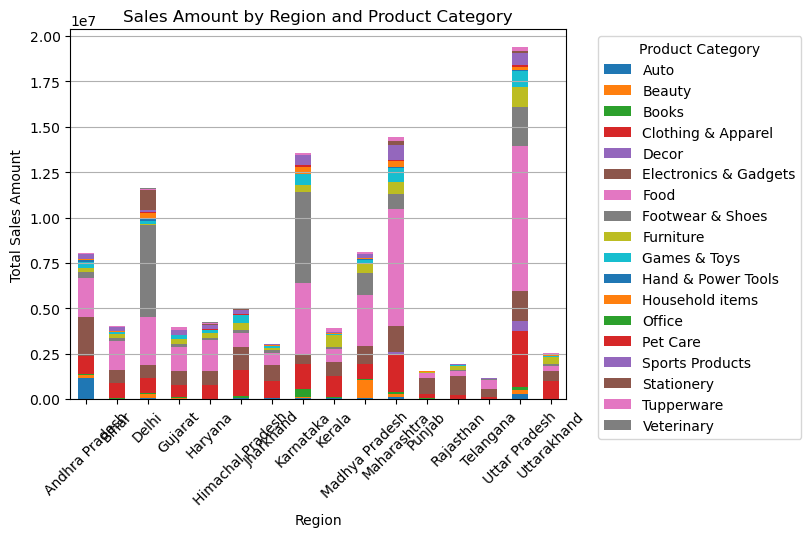

In [29]:
plt.figure(figsize=(12, 6))
region_category_sales.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.title('Sales Amount by Region and Product Category')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()